In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
from sklearn.datasets import make_blobs

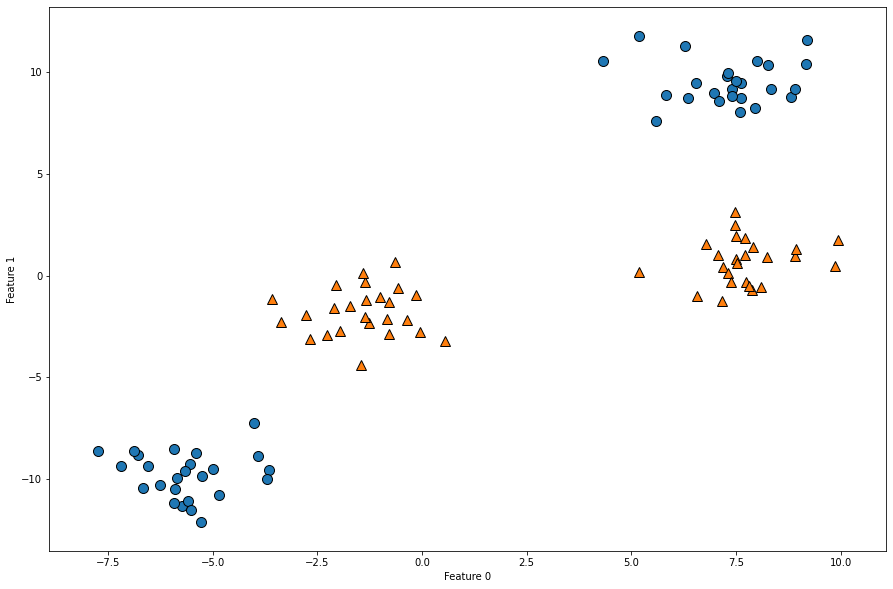

In [2]:
X,y = make_blobs(centers=4,random_state=8)
y=y%2
plt.figure(figsize=(15,10))
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

/home/shubhankar/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


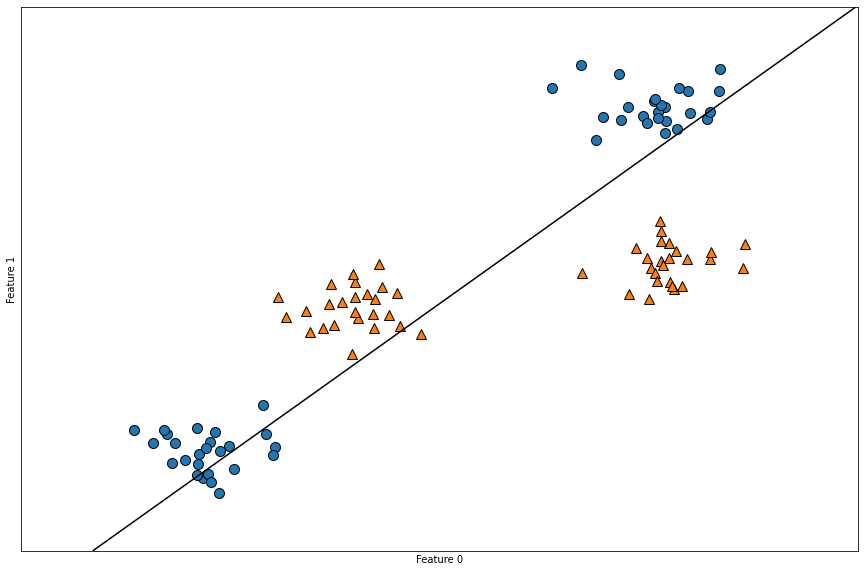

In [3]:
from sklearn.svm import LinearSVC
plt.figure(figsize=(15,10))
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [4]:
X_new = np.hstack([X,X[:,1:]**2])

In [5]:
from mpl_toolkits.mplot3d import Axes3D,axes3d

Text(0.5, 0, 'feature1 ** 2')

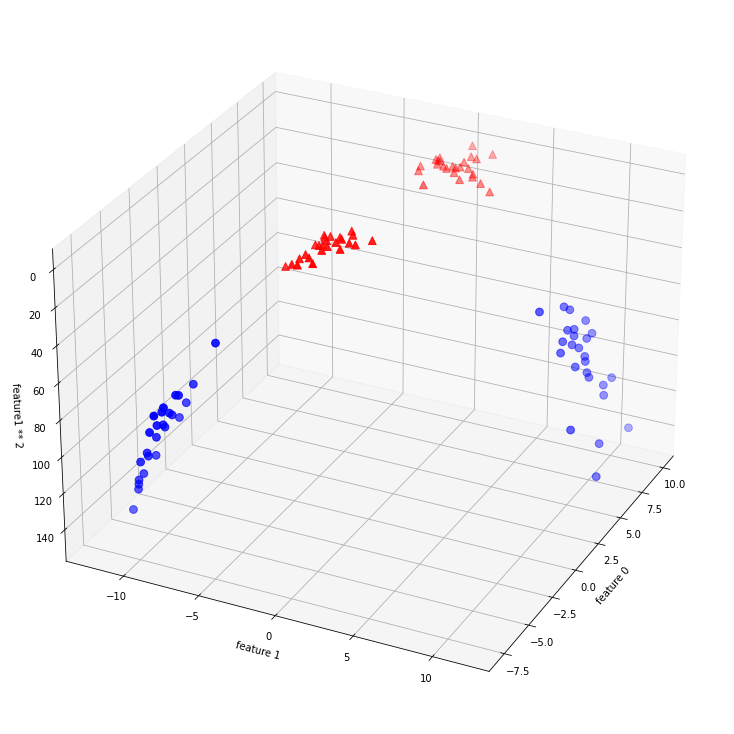

In [6]:
figure = plt.figure(figsize=(15,10))
ax=Axes3D(figure,elev=-152,azim=-26)
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

/home/shubhankar/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, 'feature0 ** 2')

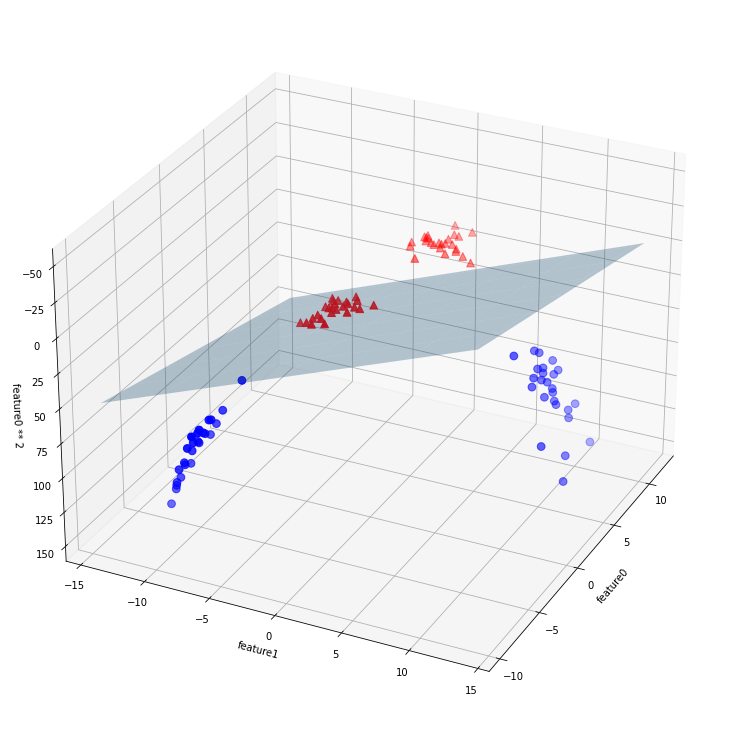

In [7]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_
figure = plt.figure(figsize=(15,10))
ax = Axes3D(figure,elev=-152,azim=-26)
xx = np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)
XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept)/ -coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask, 1], X_new[~mask,2], c='r', marker='^'
           ,cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

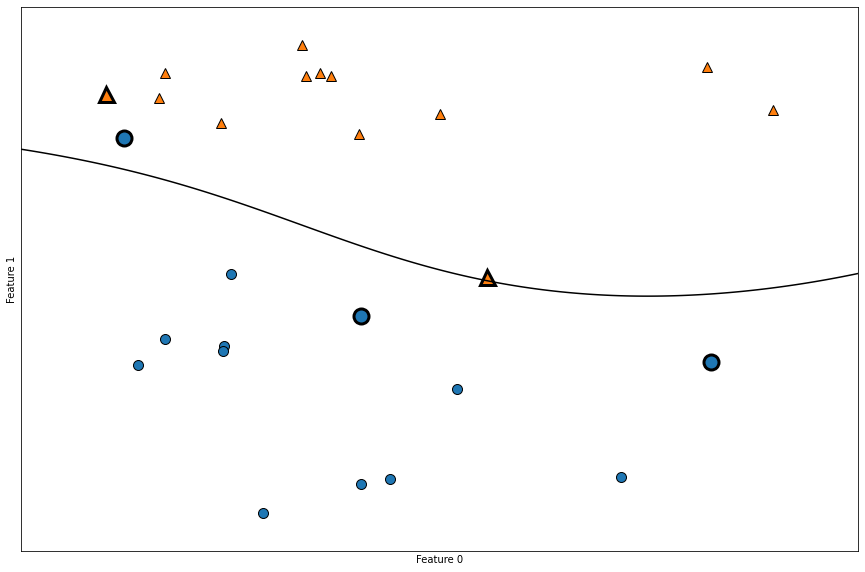

In [8]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
plt.figure(figsize=(15,10))
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv = svm.support_vectors_
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

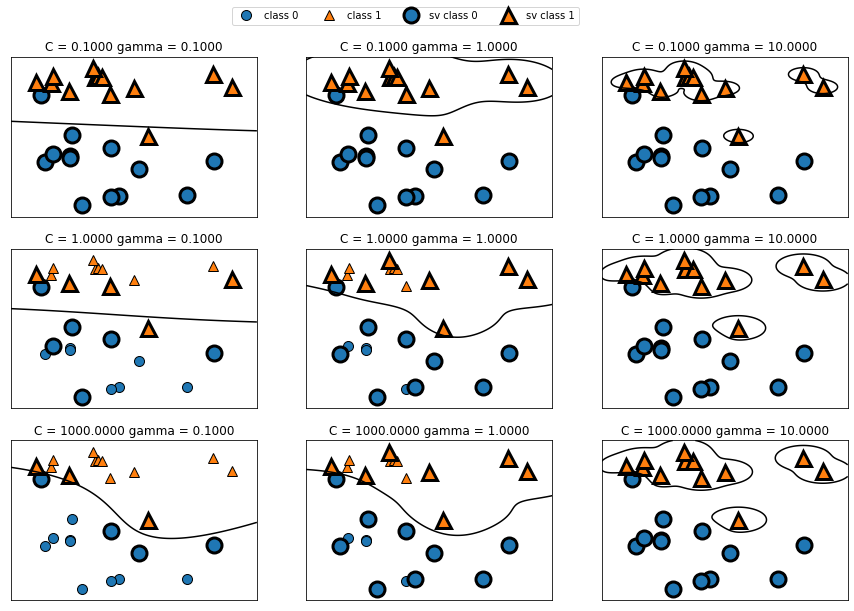

In [9]:
fig,axes = plt.subplots(3,3,figsize=(15,10))
for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
axes[0,0].legend(['class 0','class 1','sv class 0','sv class 1'],ncol=4,loc=(0.9,1.2))

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
svc = SVC()
svc.fit(X_train,y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train,y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test,y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


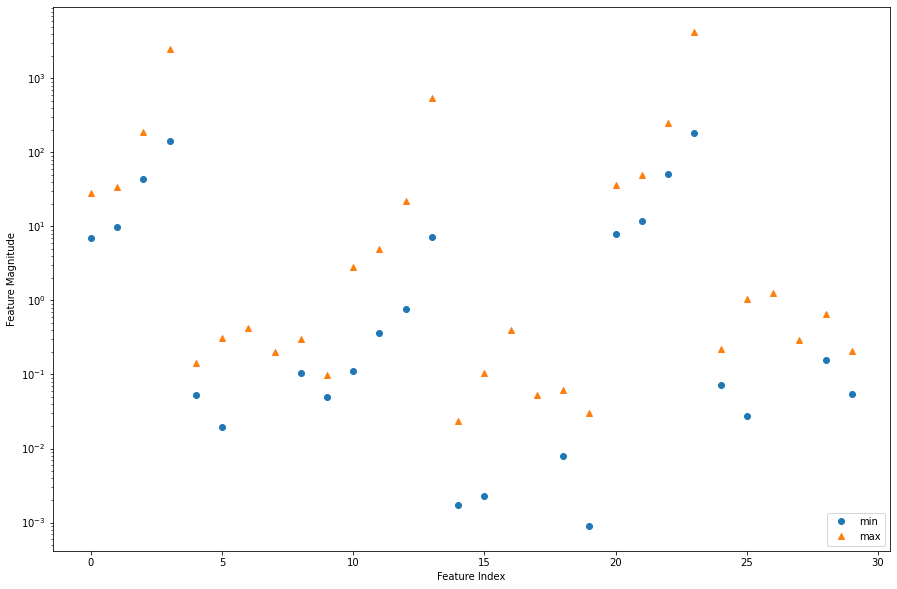

In [13]:
plt.figure(figsize=(15,10))
plt.plot(X_train.min(axis=0),'o',label="min")
plt.plot(X_train.max(axis=0),'^',label="max")
plt.legend(loc=4)
plt.xlabel("Feature Index")
plt.ylabel("Feature Magnitude")
plt.yscale("log")